In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete_correlationWithGroup.csv')
Data

,field1,Name,NewCode,code,Groupping,Sweetness,L,A,B,Total_phenol,...,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
0,0,DC1,DC8001-1,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
1,1,DC1,DC8001-2,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
2,2,DC1,DC8001-3,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
3,3,DC1,DC8001-4,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
4,4,DC1,DC8001-5,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,221,BK1,BK-10001-2,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
65,222,BK1,BK-10001-3,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
66,225,BK3,BK-10003-1,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61
67,226,BK3,BK-10003-2,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61


In [4]:
feature = ['arginine',
 'L',
 'Antioxidant',
 'glycine',
 'B',
 'A',
 'phynylalanine',
 'Apartic_acid',
 'leucine',
 'Serine',
 'alanine',
 'threonine',
 'proline',
 'histidine',
 'caffeic_acid',
 'K',
 'Fe',
 'Theobromine',
 'fluctose_arabinise',
 'sucrose_maltose',
 'glutamic_acid',
 'Sweetness',
 'Lactic_acid']
feature

['arginine',
 'L',
 'Antioxidant',
 'glycine',
 'B',
 'A',
 'phynylalanine',
 'Apartic_acid',
 'leucine',
 'Serine',
 'alanine',
 'threonine',
 'proline',
 'histidine',
 'caffeic_acid',
 'K',
 'Fe',
 'Theobromine',
 'fluctose_arabinise',
 'sucrose_maltose',
 'glutamic_acid',
 'Sweetness',
 'Lactic_acid']

In [5]:
feature_corr = Data[feature].corr()
feature_uncorr = feature_corr.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) <= 0.05 else 'background-color: white')
feature_uncorr

,arginine,L,Antioxidant,glycine,B,A,phynylalanine,Apartic_acid,leucine,Serine,alanine,threonine,proline,histidine,caffeic_acid,K,Fe,Theobromine,fluctose_arabinise,sucrose_maltose,glutamic_acid,Sweetness,Lactic_acid
arginine,1.000000,0.144081,0.276384,0.583193,0.048754,0.396495,0.953879,0.763245,0.716884,0.875872,0.937464,0.899621,0.793447,0.738760,0.337311,0.429482,-0.387689,0.098236,-0.407992,-0.390681,-0.151218,-0.346404,0.666038
L,0.144081,1.000000,0.727403,0.707191,0.855970,0.736782,0.151947,0.075767,0.127863,-0.023217,0.151388,0.111233,0.071911,0.351450,0.494378,0.281987,-0.826799,-0.659167,-0.724650,-0.785085,-0.751899,-0.552677,0.573523
Antioxidant,0.276384,0.727403,1.000000,0.612025,0.470224,0.566567,0.305951,-0.065513,0.311569,0.241429,0.330417,0.315209,0.254736,0.332657,0.636962,0.126964,-0.388554,-0.557886,-0.236086,-0.330278,-0.799542,-0.653692,0.674514
glycine,0.583193,0.707191,0.612025,1.000000,0.603464,0.837245,0.642242,0.534016,0.752163,0.537585,0.699064,0.707844,0.729937,0.835162,0.466169,0.679707,-0.727189,-0.410014,-0.693261,-0.827224,-0.645759,-0.585155,0.688823
B,0.048754,0.855970,0.470224,0.603464,1.000000,0.548732,-0.008063,-0.023502,0.123144,-0.225910,0.042923,0.025251,0.054642,0.280394,0.456570,0.367564,-0.666567,-0.403792,-0.714439,-0.777991,-0.744277,-0.375935,0.393204
A,0.396495,0.736782,0.566567,0.837245,0.548732,1.000000,0.379992,0.374259,0.533893,0.309156,0.472500,0.426016,0.449758,0.518953,0.551825,0.355249,-0.677421,-0.772327,-0.620067,-0.726978,-0.520495,-0.459398,0.524475
phynylalanine,0.953879,0.151947,0.305951,0.642242,-0.008063,0.379992,1.000000,0.773710,0.762542,0.924850,0.962616,0.953396,0.856724,0.816402,0.267253,0.525078,-0.440881,0.150089,-0.396222,-0.423255,-0.184494,-0.462341,0.652546
Apartic_acid,0.763245,0.075767,-0.065513,0.534016,-0.023502,0.374259,0.773710,1.000000,0.507453,0.792443,0.725109,0.698058,0.630672,0.817996,-0.223058,0.591268,-0.486496,0.030766,-0.582419,-0.489991,0.236659,0.069506,0.439110
leucine,0.716884,0.127863,0.311569,0.752163,0.123144,0.533893,0.762542,0.507453,1.000000,0.738585,0.852823,0.900534,0.966035,0.723482,0.487368,0.531622,-0.230421,0.008433,-0.207842,-0.397050,-0.392716,-0.518035,0.528130
Serine,0.875872,-0.023217,0.241429,0.537585,-0.225910,0.309156,0.924850,0.792443,0.738585,1.000000,0.870840,0.882385,0.806679,0.752647,0.096325,0.370950,-0.242397,0.093753,-0.181153,-0.196794,0.026596,-0.263308,0.657923


In [6]:
X = Data[feature]
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=X_t.shape[1])

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=23) = [1.19294959e+01 5.08752040e+00 2.69237862e+00 1.38697450e+00
 9.08102528e-01 6.20450705e-01 4.07170217e-01 3.06142466e-01
 3.00544334e-31 6.69747060e-32 4.59882971e-32 3.49656268e-32
 1.79220128e-32 9.30540231e-33 1.91828066e-33 1.62671654e-33
 1.17388966e-33 5.35529674e-34 1.15067062e-34 2.31549078e-35
 1.09211416e-35 2.73303979e-37 4.85142619e-38]
explained_variance_ratio (n_components=23) = [5.11156722e-01 2.17990792e-01 1.15363419e-01 5.94292792e-02
 3.89105053e-02 2.65851594e-02 1.74464869e-02 1.31176356e-02
 1.28777660e-32 2.86974166e-33 1.97051305e-33 1.49821211e-33
 7.67924933e-34 3.98719191e-34 8.21947603e-35 6.97017797e-35
 5.02989900e-35 2.29464511e-35 4.93040971e-36 9.92144758e-37
 4.67950616e-37 1.17105675e-38 2.07874594e-39]
sum explained_variance_ratio = 1.0


In [8]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

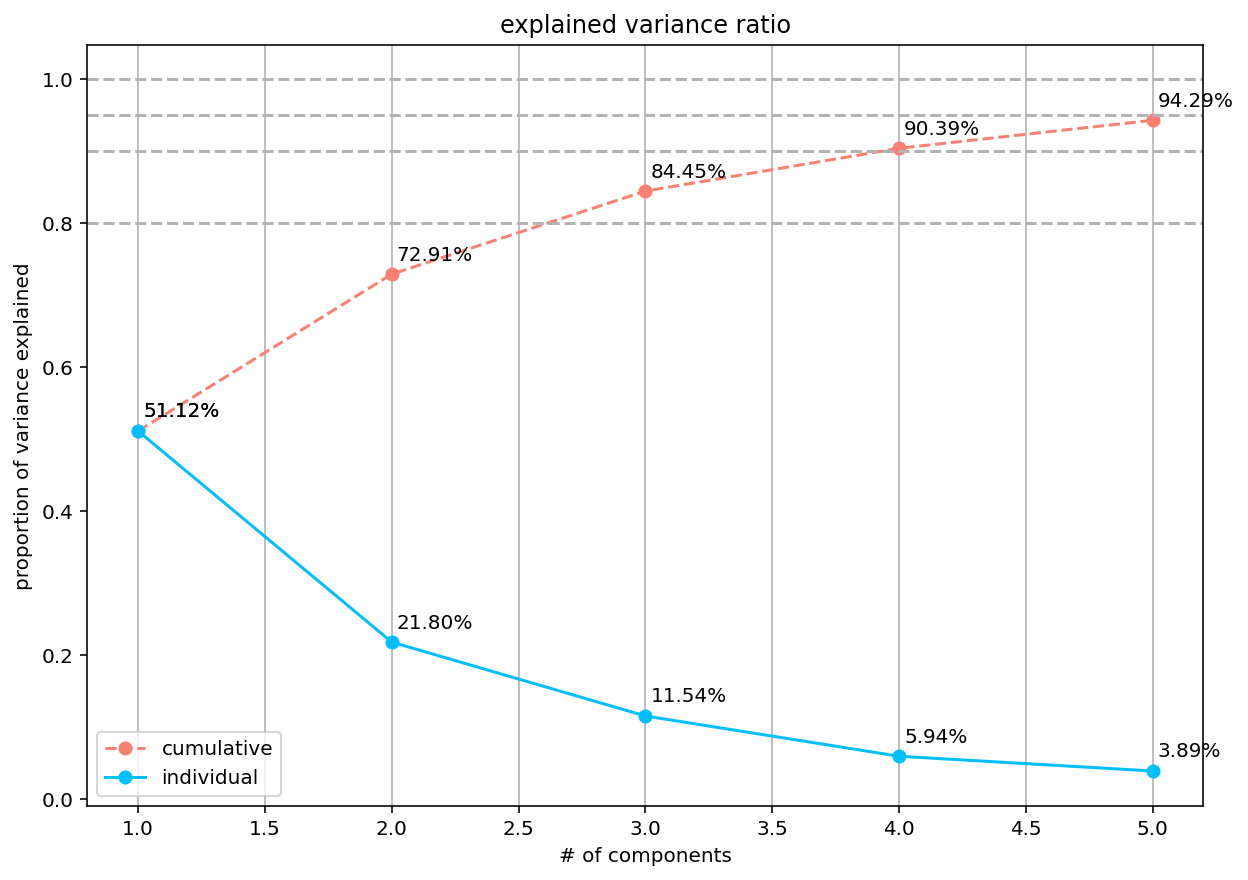

In [9]:
scree_plot(X, 5, True, True)

In [10]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=Data[feature].columns,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
arginine,0.231800,-0.203400,-0.061600,0.130700,0.211500,-0.178700,0.266000,-0.361200,0.505800,0.321100,0.125700,0.027000,0.201200,0.128800,-0.198800,0.143500,0.109600,0.007200,-0.048800,-0.193600,0.200200,0.146300,-0.008900
L,0.176400,0.342500,0.075100,0.081900,0.127200,0.095900,-0.063400,-0.031600,-0.231000,0.155200,0.221700,-0.001400,-0.407400,0.061100,0.109100,0.266000,0.397500,0.009000,0.122800,0.190500,0.324500,0.335100,-0.053400
Antioxidant,0.167100,0.218600,-0.268900,0.153700,0.041800,0.523300,-0.129200,-0.327300,0.007500,-0.280700,-0.024600,0.172900,0.110800,-0.043800,0.052900,-0.203000,0.097100,-0.219200,-0.182000,-0.309600,-0.162100,0.220700,0.006500
glycine,0.276900,0.084400,0.035300,-0.017300,-0.189600,0.111700,-0.009600,0.251800,0.114600,0.063400,-0.468600,-0.032100,0.327900,-0.278600,-0.071700,0.103600,0.258700,-0.224800,-0.094000,0.192900,0.255400,-0.103100,-0.353100
B,0.140000,0.329000,0.134100,-0.206100,0.089000,0.019100,0.526900,0.088100,-0.004800,-0.115100,0.073500,-0.108900,0.142000,-0.124900,0.099800,-0.250000,-0.309200,0.158100,0.304200,-0.105500,0.032000,0.277000,-0.277800
A,0.219000,0.180400,0.026400,0.243000,-0.406300,-0.258200,-0.069700,-0.005700,-0.158800,0.226400,0.011800,0.166500,0.073300,0.423100,0.158900,-0.363500,-0.060500,0.214000,-0.300600,-0.036100,0.059800,-0.013000,-0.179600
phynylalanine,0.243200,-0.216900,-0.059800,0.058900,0.213300,-0.054900,-0.119000,-0.146300,0.068800,-0.097700,-0.048600,-0.053300,-0.032300,-0.069300,0.373000,-0.194000,0.390400,0.355800,0.342500,0.028900,-0.238700,-0.299700,-0.238000
Apartic_acid,0.189900,-0.233200,0.291000,0.233400,0.029300,-0.064200,0.039900,0.029400,-0.041000,-0.263400,0.330600,-0.468700,0.206800,0.002200,0.276800,-0.100600,0.016300,-0.328000,-0.222700,0.225000,0.007900,0.102300,0.121500
leucine,0.231900,-0.147300,-0.186500,-0.125300,-0.312300,-0.101400,0.148800,0.377600,0.355100,-0.155300,0.090200,0.358700,-0.229500,0.108300,0.170800,-0.053300,0.117700,-0.263800,0.204500,0.054400,-0.126300,0.175600,0.207700
Serine,0.203700,-0.276000,-0.083700,0.257100,0.078700,0.116000,-0.071000,0.137300,0.006600,0.060800,-0.097100,-0.136400,-0.429200,-0.252800,-0.342900,-0.493200,-0.174500,0.077600,0.018700,0.005900,0.284800,0.062500,0.056000


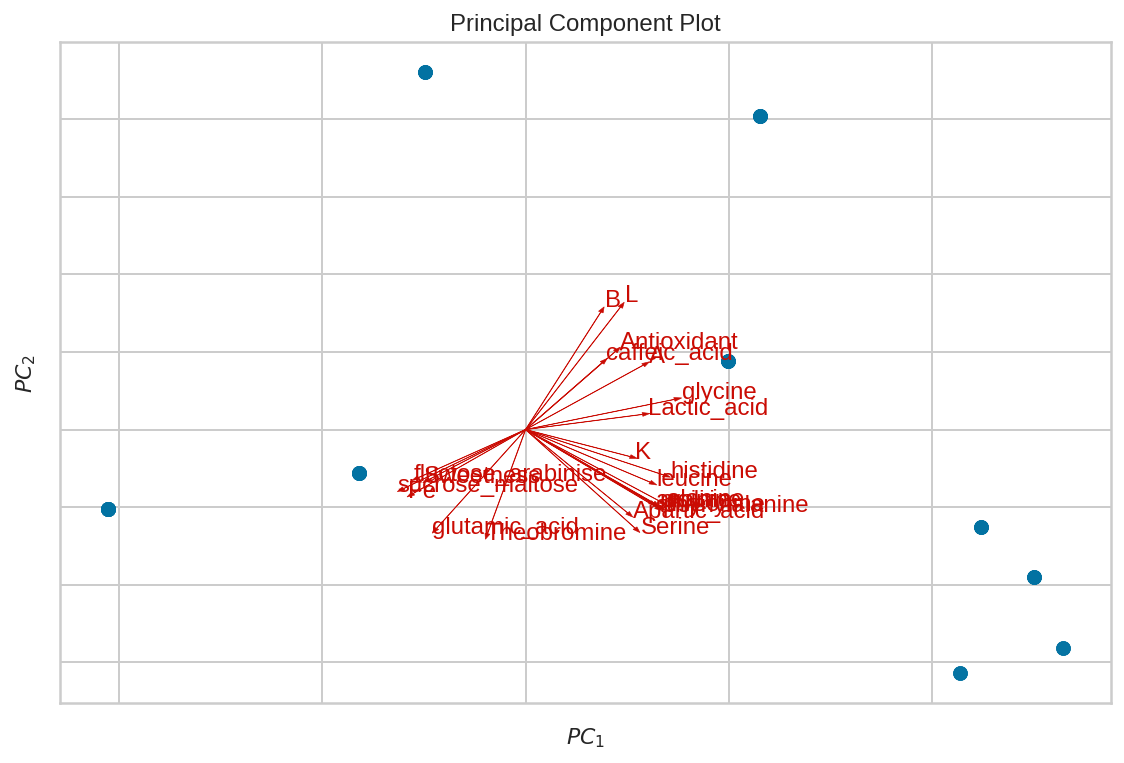

In [11]:
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [12]:
pca1 = PCA(n_components= 2)
components = pca1.fit_transform(X_t)
fig = px.scatter(components, x = 0, y = 1, color = Data['Groupping'])
fig.show()

In [13]:
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)

X_pca

array([[-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-4.10885416, -1.02631449],
       [-1.63714305, -0.56564086],
       [-1.63714305, -0.56564086],
       [-1.63714305, -0.56564086],
       [-1.63714305, -0.56564086],
       [-1.63714305, -0.56564086],
       [-1.63714305, -0.56564086],
       [-1.63714305, -0.56564086],
       [-1.63714305, -0.56564086],
       [-1.63714305,

In [14]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              Data[['Groupping']]], axis = 'columns')

dd

,PC1,PC2,Groupping
0,-4.108854,-1.026314,1
1,-4.108854,-1.026314,1
2,-4.108854,-1.026314,1
3,-4.108854,-1.026314,1
4,-4.108854,-1.026314,1
...,...,...,...
64,4.274741,-3.135971,6
65,4.274741,-3.135971,6
66,5.282948,-2.810131,6
67,5.282948,-2.810131,6


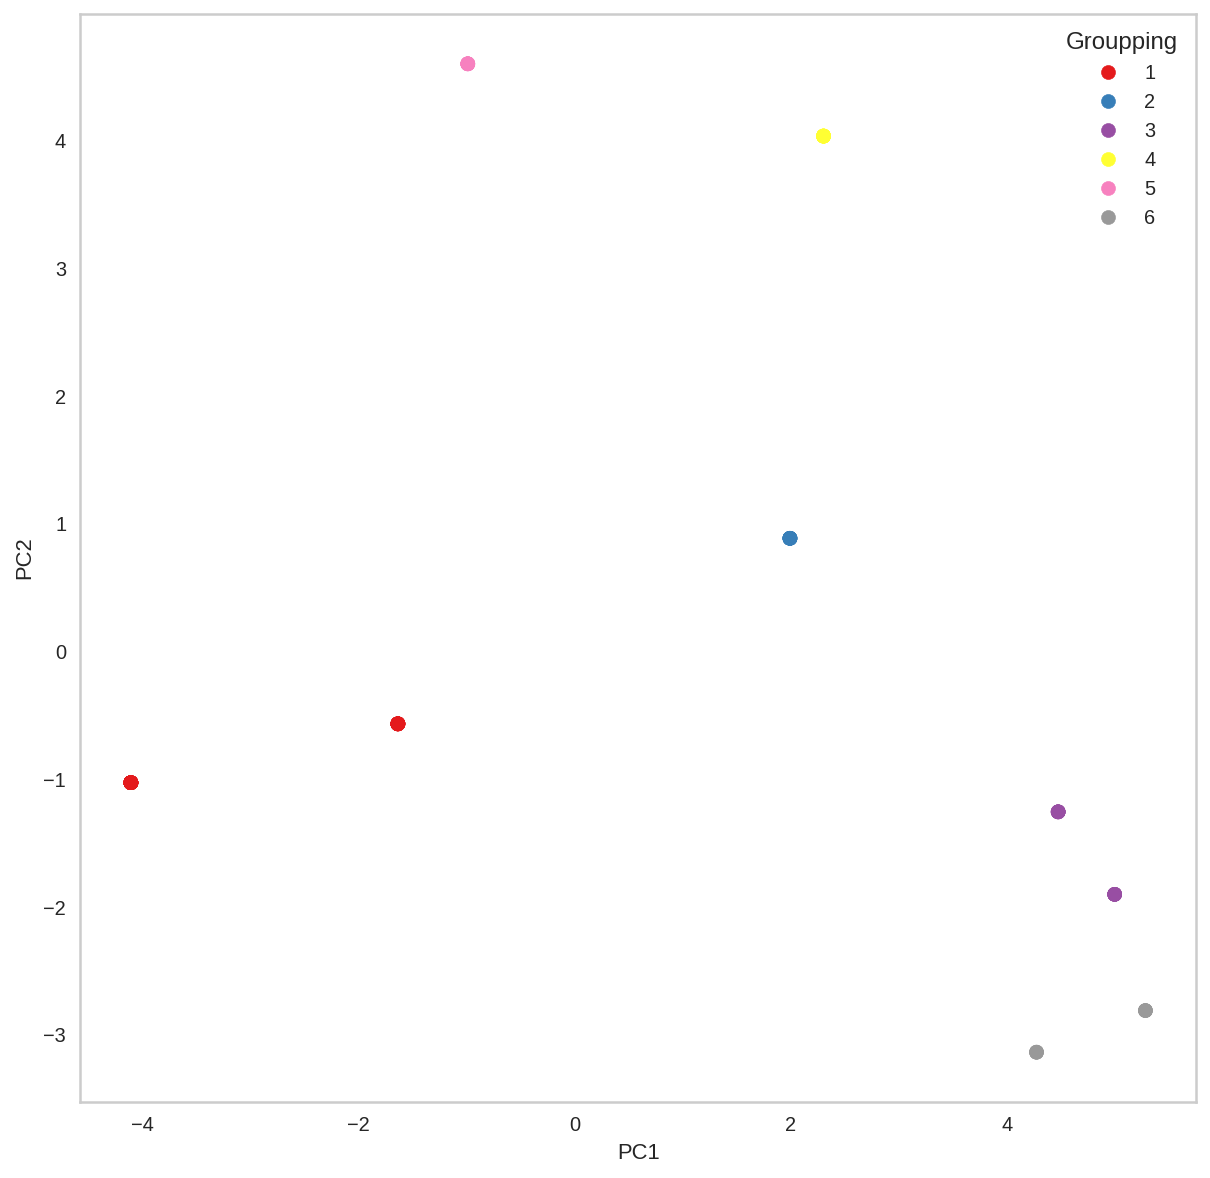

In [15]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(dd['PC1'],dd['PC2'],cmap='Set1', c=Data.Groupping.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(b=None)
plt.legend(handles=scatter.legend_elements()[0], 
           labels = ['1','2','3','4','5','6'],
           title = "Groupping")
plt.show()